# Figure 1: Graphical description of the three gaps of learning for a toy example


In this case, we have that the data generative distribution is a Bionomial model with parametesa ``px``. And the model family is composed by two Binomial models, whose probabilities are stored in the list ``px_theta``. 

We first start by introducing the functions to plot: $\bar{L}(\rho)$,$\bar{L}_J(\rho)$ and $\bar{L}_{J^2}(\rho)$. Note that the mixture distribution $\rho$ is only defined with one parameter. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def logexpectation(rho, px_theta):
    return -np.log(px_theta[0]*rho + px_theta[1]*(1-rho))

def expecationlog(rho, px_theta):
    return -rho*np.log(px_theta[0]) - (1-rho)*np.log(px_theta[1])

def var(p,px_theta):
    mean = px_theta[0]*p + px_theta[1]*(1-p)
    mean_square = px_theta[0]*px_theta[0]*p + px_theta[1]*px_theta[1]*(1-p)
    return mean_square - mean*mean

def CE(rho,px,px_theta):
    return px[0]*logexpectation(rho,px_theta[0])+px[1]*logexpectation(rho,px_theta[1])

def ExpectedLogLoss(rho,px,px_theta):
    return px[0]*expecationlog(rho,px_theta[0])+px[1]*expecationlog(rho,px_theta[1])
    
def SecondOrderJensenBound(rho,px,px_theta):
    return ExpectedLogLoss(rho,px,px_theta) \
            - 0.5/(np.max(px_theta[0])*np.max(px_theta[0]))*px[0]*var(rho,px_theta[0]) \
            - 0.5/(np.max(px_theta[1])*np.max(px_theta[1]))*px[1]*var(rho,px_theta[1])


## Model Miss-specification

In this case, the true data generative model is a binomial distribution with $p=0.6$. And our model family is defined by two Binoial models, the first with $p=0.7$ and the second one with $p=0.45$. 

In [2]:
px_theta = ((0.7, 0.45),(1-0.7, 1-0.45))
px = (0.6, 1-0.6)

We can now produce the plots. 

In [3]:
rho= np.linspace(0.0,1.0,1001)
CE_rho = CE(rho,px,px_theta)
ELL_rho = ExpectedLogLoss(rho,px,px_theta)
LJ2_rho = SecondOrderJensenBound(rho,px,px_theta)
entropy = rho - px[0]*np.log(px[0]) - px[1]*np.log(px[1]) - rho

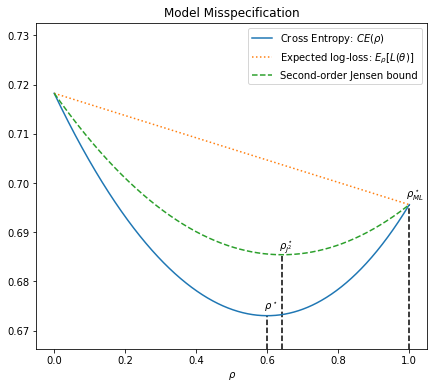

In [5]:
plt.figure(figsize=(7,6))

plt.plot(rho,CE_rho, label=r'Cross Entropy: $CE(\rho)$',linestyle='-')
plt.plot(rho,ELL_rho, label=r'Expected log-loss: $E_{\rho}[L(\theta)]$', linestyle=':')
plt.plot(rho,LJ2_rho, label=r'Second-order Jensen bound',linestyle='--')

plt.vlines(x=np.argmin(CE_rho)/(rho.shape[0]), ymin=entropy[0]*0.99, ymax=np.min(CE_rho), color='k', linestyle='--')#,label=r'$\rho^\star$')
plt.vlines(x=np.argmin(ELL_rho)/(rho.shape[0]), ymin=entropy[0]*0.99, ymax=np.min(ELL_rho), color='k', linestyle='--')#,label=r'$\rho_J^\star$')
plt.vlines(x=np.argmin(LJ2_rho)/(rho.shape[0]), ymin=entropy[0]*0.99, ymax=np.min(LJ2_rho), color='k', linestyle='--')#,label=r'$\rho^\star_{J^2}$')

plt.text(np.argmin(CE_rho)/(rho.shape[0]-1)-0.01, np.min(CE_rho)*1.002, r'$\rho^\star$', )
plt.text(np.argmin(ELL_rho)/(rho.shape[0]-1)-0.01, np.min(ELL_rho)*1.002, r'$\rho^\star_{ML}$', )
plt.text(np.argmin(LJ2_rho)/(rho.shape[0]-1)-0.01, np.min(LJ2_rho)*1.002, r'$\rho^\star_{J^2}$', )

plt.title('Model Misspecification')
plt.ylim(entropy[0]*0.99,np.max(CE_rho)*1.02)
plt.xlabel(r'$\rho$')
plt.legend()
plt.show()


## Perfect Model Specification

In this case, the true data generative model is again a binomial distribution with $p=0.6$. And our model family is defined by two Binoial models, the first with $p=0.6$ and the second one with $p=0.4$. The optimal mixture is achieved with the first model, hence with $\rho=1$.

In [6]:
px_theta = ((0.6, 0.4),(1-0.6, 1-0.4))
px = (0.6, 1-0.6)

In [7]:
rho= np.linspace(0.0,1.0,1001)
CE_rho = CE(rho,px,px_theta)
ELL_rho = ExpectedLogLoss(rho,px,px_theta)
LJ2_rho = SecondOrderJensenBound(rho,px,px_theta)
entropy = rho - px[0]*np.log(px[0]) - px[1]*np.log(px[1]) - rho

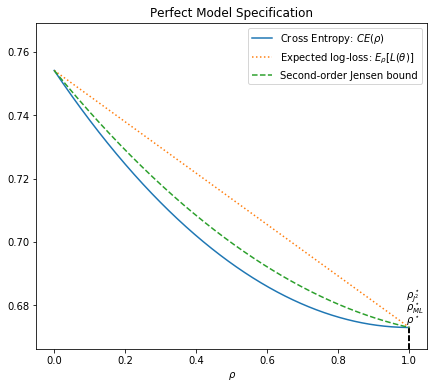

In [8]:

plt.figure(figsize=(7,6))

plt.plot(rho,CE_rho, label=r'Cross Entropy: $CE(\rho)$',linestyle='-')
plt.plot(rho,ELL_rho, label=r'Expected log-loss: $E_{\rho}[L(\theta)]$', linestyle=':')
plt.plot(rho,LJ2_rho, label=r'Second-order Jensen bound',linestyle='--')

plt.vlines(x=np.argmin(CE_rho)/(rho.shape[0]), ymin=entropy[0]*0.99, ymax=np.min(CE_rho), color='k', linestyle='--')#,label=r'$\rho^\star$')
plt.vlines(x=np.argmin(ELL_rho)/(rho.shape[0]), ymin=entropy[0]*0.99, ymax=np.min(ELL_rho), color='k', linestyle='--')#,label=r'$\rho_J^\star$')
plt.vlines(x=np.argmin(LJ2_rho)/(rho.shape[0]), ymin=entropy[0]*0.99, ymax=np.min(LJ2_rho), color='k', linestyle='--')#,label=r'$\rho^\star_{J^2}$')

plt.text(np.argmin(CE_rho)/(rho.shape[0]-1)-0.01, np.min(CE_rho)*1.002, r'$\rho^\star$', )
plt.text(np.argmin(ELL_rho)/(rho.shape[0]-1)-0.01, np.min(ELL_rho)*1.008, r'$\rho^\star_{ML}$', )
plt.text(np.argmin(LJ2_rho)/(rho.shape[0]-1)-0.01, np.min(LJ2_rho)*1.014, r'$\rho^\star_{J^2}$', )

plt.title('Perfect Model Specification')
plt.ylim(entropy[0]*0.99,np.max(CE_rho)*1.02)
plt.xlabel(r'$\rho$')
plt.legend()
plt.show()